## Question 1 (a)
Find the wheel velocities from the robot motion, and plot ω1 vs t and ω2 vs t.

/tmp/ipykernel_329536/2830114409.py:55: RuntimeWarning: divide by zero encountered in double_scalars
  angle = np.arctan(1/(3*k))


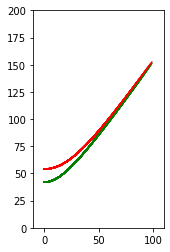

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation 
import scipy.stats as stats
%matplotlib inline

r = 0.5 # radius of circle or robot
Ir = 2*r # robot circle diameter
d = Ir/2 # robot wheel diameter
l = Ir
R = d
phi1_dot = []
phi2_dot = []

w1 = []
w2 = []

vel = []

eta_dot = []

linear_vel = []
angular_vel = []

axis = np.linspace(0,2,100)

fig, ax = plt.subplots()

curve_list = []

theta = []

plt.xlim(-10, 110)
plt.ylim(0, 200)

ax.set_aspect("equal")

t = np.linspace(0,1,100)

def curve():
    
    curve = []
    global a
    a = 4
    
    for i in range(0,len(axis)):
        k = t[i]
    
        xt = (a*k**2)*9
        yt = (2*a*k)*3
        curve_list.append([xt,yt])
        
        angle = np.arctan(1/(3*k))
        
        theta.append(angle)
        
        xt_dot = 18*a*k
        yt_dot = 6*a
        theta_dot = -3/(9*k**2 + 1)
        
        linear_vel.append([xt_dot,yt_dot])
        angular_vel.append(theta_dot)
            
        v = np.sqrt(xt_dot**2 + yt_dot**2)
        vel.append(v)

        eta_dot.append([xt_dot,yt_dot,theta_dot])
    
        R_theta = np.array([[np.cos(theta[i]),np.sin(theta[i]),0],
                           [-np.sin(theta[i]),np.cos(theta[i]),0],
                           [0,0,1]])
        
        matrix2 = np.dot(R_theta,eta_dot[i])
        matrix2[1] = 0
    
        phi1_dot_point = (matrix2[0]+l*matrix2[2])/R
        phi2_dot_point = (matrix2[0]-l*matrix2[2])/R
        phi1_dot.append(phi1_dot_point)
        phi2_dot.append(phi2_dot_point)   
        
        w1_calc = (R*phi1_dot[i])/2*l
        w2_calc = -(R*phi2_dot[i])/2*l
        w1.append(w1_calc)
        w2.append(w2_calc)
        
        plt.plot(phi1_dot, color='g')
        plt.plot(phi2_dot, color='r')
        
        
curve()
    

## Question 1 (b)
Take random 50 samples of a normal distribution (for every iteration), where mean µ is the wheel velocity (ω i , i = 1,2) and standard deviation is σ = l R /10 for one iteration. Plot the probability distribution of these 50 sample data for the first iteration.

/tmp/ipykernel_329536/3413948430.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  angle = np.arctan(1/(3*k))


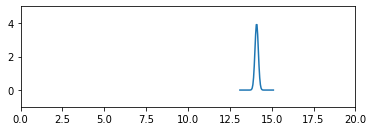

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation 
import scipy.stats as stats
%matplotlib inline

r = 0.5 # radius of circle or robot
Ir = 2*r # robot circle diameter
d = Ir/2 # robot wheel diameter
l = Ir
R = d
phi1_dot = []
phi2_dot = []

w1 = []
w2 = []

vel = []

eta_dot = []

linear_vel = []
angular_vel = []

axis = np.linspace(0,2,100)

fig, ax = plt.subplots()

curve_list = []

theta = []

# plt.xlim(-10, 110)
# plt.ylim(0, 200)

plt.xlim(0, 20)
plt.ylim(-1, 5)

ax.set_aspect("equal")

t = np.linspace(0,1,100)

def curve():
    
    curve = []
    global a
    a = 4
    
    for i in range(0,len(axis)):
        k = t[i]
    
        xt = (a*k**2)*9
        yt = (2*a*k)*3
        curve_list.append([xt,yt])
        
        angle = np.arctan(1/(3*k))
        
        theta.append(angle)
        
        xt_dot = 18*a*k
        yt_dot = 6*a
        theta_dot = -3/(9*k**2 + 1)
        
        linear_vel.append([xt_dot,yt_dot])
        angular_vel.append(theta_dot)
            
        v = np.sqrt(xt_dot**2 + yt_dot**2)
        vel.append(v)

        eta_dot.append([xt_dot,yt_dot,theta_dot])
    
        R_theta = np.array([[np.cos(theta[i]),np.sin(theta[i]),0],
                           [-np.sin(theta[i]),np.cos(theta[i]),0],
                           [0,0,1]])
        
        matrix2 = np.dot(R_theta,eta_dot[i])
        matrix2[1] = 0
    
        phi1_dot_point = (matrix2[0]+l*matrix2[2])/R
        phi2_dot_point = (matrix2[0]-l*matrix2[2])/R
        phi1_dot.append(phi1_dot_point)
        phi2_dot.append(phi2_dot_point)   
        
        w1_calc = (R*phi1_dot[i])/2*l
        w2_calc = -(R*phi2_dot[i])/2*l
        w1.append(w1_calc)
        w2.append(w2_calc)
        
        
curve()

def gaussian():
    
    i = 25
    
    mu1 = w1[i]
    mu2 = w2[i]
    sigma = Ir/10

    pdf1 = np.linspace(mu1 - 10*sigma, mu1 + 10*sigma, 50)
    plt.plot(pdf1, stats.norm.pdf(pdf1,mu1,sigma))

gaussian()


    

## Question 1 (c)
Due to the randomness (normal distribution) of the wheel rotation all 50 instances will not reach at the same pose. Make a scatter plot all these instances after 10 iterations (Only dots for the position of the robot, circle and line are not necessary). Also, show the path for reference.

/tmp/ipykernel_329536/3836576610.py:56: RuntimeWarning: divide by zero encountered in double_scalars
  angle = np.arctan(1/(3*k))


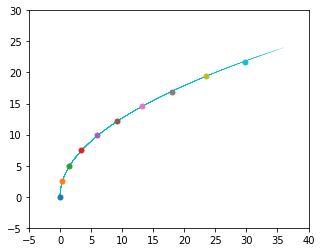

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation 
import scipy.stats as stats
import random
%matplotlib inline

r = 0.5 # radius of circle or robot
Ir = 2*r # robot circle diameter
d = Ir/2 # robot wheel diameter
l = Ir
R = d
phi1_dot = []
phi2_dot = []

w1 = []
w2 = []

vel = []

eta_dot = []

linear_vel = []
angular_vel = []

axis = np.linspace(0,2,100)

fig, ax = plt.subplots()

curve_list = []

theta = []

plt.xlim(-5, 40)
plt.ylim(-5, 30)

ax.set_aspect("equal")

t = np.linspace(0,1,100)

def curve():
    
    curve = []
    global a
    a = 4
    
    for i in range(0,len(axis)):
        k = t[i]
    
        xt = (a*k**2)*9
        yt = (2*a*k)*3
        curve_list.append([xt,yt])
        
        angle = np.arctan(1/(3*k))
        
        theta.append(angle)
        
        xt_dot = 18*a*k
        yt_dot = 6*a
        theta_dot = -3/(9*k**2 + 1)
        
        linear_vel.append([xt_dot,yt_dot])
        angular_vel.append(theta_dot)
            
        v = np.sqrt(xt_dot**2 + yt_dot**2)
        vel.append(v)

        eta_dot.append([xt_dot,yt_dot,theta_dot])
    
        R_theta = np.array([[np.cos(theta[i]),np.sin(theta[i]),0],
                           [-np.sin(theta[i]),np.cos(theta[i]),0],
                           [0,0,1]])

        matrix2 = np.dot(R_theta,eta_dot[i])
        matrix2[1] = 0
    
        phi1_dot_point = (matrix2[0]+l*matrix2[2])/R
        phi2_dot_point = (matrix2[0]-l*matrix2[2])/R
        phi1_dot.append(phi1_dot_point)
        phi2_dot.append(phi2_dot_point)   
        
        w1_calc = (R*phi1_dot[i])/2*l
        w2_calc = -(R*phi2_dot[i])/2*l
        w1.append(w1_calc)
        w2.append(w2_calc)
        
        points_t = pd.DataFrame(curve_list)
        plt.plot(points_t[0], points_t[1], color='c', lw=0.2)
        
        
curve()


def pdf():
    
    global w1_pdf,w2_pdf
    w1_pdf = []
    w2_pdf = []
    
    sigma = Ir/10
    
    for i in range(0,len(axis)):
        mu1 = w1[i]
        mu2 = w2[i]
        pdf1 = np.linspace(mu1 - 10*sigma, mu1 + 10*sigma, 50)
        pdf2 = np.linspace(mu2 - 10*sigma, mu2 + 10*sigma, 50)
        w1_pdf.append(pdf1)
        w2_pdf.append(pdf2)
        
    update_robot()
                

def update_robot():
    
    global x_new, y_new
    
    x_dot_update = []
    y_dot_update = []
    x_new = []
    y_new = []
    
    for i in range(0,len(axis)):
        R_theta_inv = np.array([[np.cos(theta[i]),-np.sin(theta[i]),0],
                            [np.sin(theta[i]),np.cos(theta[i]),0],
                            [0,0,1]])


        matrix3 = np.array([[random.choice(w1_pdf[i])*l-random.choice(w2_pdf[i])*l],
                            [0],
                            [random.choice(w1_pdf[i])+random.choice(w2_pdf[i])]])
        matrix4 = np.dot(R_theta_inv,matrix3)

        x_dot_update = matrix4[0]
        y_dot_update = matrix4[1]
            

        x_new_point = a*(x_dot_update**2)/y_dot_update**2
        y_new_point = x_dot_update/3
        x_new.append(x_new_point)
        y_new.append(y_new_point)

pdf() 
    
for i in range(0,100,10): # Path is divided into small segments and the robot is plotted at those poses
    plt.plot(x_new[i],y_new[i], marker='o', markersize=5)      
                
            



## Question 1 (d)
Generate a simulation of this scatter samples starting from the initial pose at t 0 and gradually moving along the given trajectory.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

lst = []

# axis = np.linspace(0,2,100)

for i in range(0,len(x_new)):
    lst.append([x_new[i],y_new[i]])

# resolve max values for x and y axes
max_x = max([pt[0] for pt in lst]) + 1
max_y = max([pt[1] for pt in lst]) + 1

# create figure and set limits
fig = plt.figure()
plt.xlim(0, max_x)
plt.ylim(0, max_y)

# create graph
graph, = plt.plot([], [], 'o')


def curve():
    
    curve = []
    global a
    a = 4
    
    for i in range(0,len(axis)):
        k = t[i]
    
        xt = (a*k**2)*9
        yt = (2*a*k)*3
        curve.append([xt,yt])
        
        points_t = pd.DataFrame(curve)
        plt.plot(points_t[0], points_t[1], color='c', lw=0.2)
        
curve()
def animate(i):
    
    for j in range(0,i):
        graph.set_data(lst[j][0], lst[j][1])

ani = FuncAnimation(fig, animate, frames=len(lst), interval=200, repeat=True)


# Embeds video in Jupyter using HTML
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)

plt.close()

In [8]:
import numpy as np
import random
random.random()

0.47578764633846593

In [19]:
def initialize_circle(num_bots, origin=(4, 4), check=False):
    r = 0.1
    for i in range(num_bots):
        theta = random.random()*3.1415926*2
        xpos = origin[0] + r*math.cos(theta)
        ypos = origin[1] + r*math.sin(theta)
        print(theta, xpos, ypos)

In [20]:
initialize_circle(15, check=True)

5.697111881475854 4.083311886067099 3.9446906007992966
1.0545390208903802 4.049362868362226 4.086967276760018
0.9815830971619188 4.055570709128132 4.083137815024191
1.6077398158485317 3.996306491391689 4.0999317666918795
4.848894355347717 4.0136081835997635 3.900930240037057
4.804499079138219 4.0091979906166175 3.900423913670919
1.5268353216190431 4.004394684692422 4.099903387061972
4.292462766569684 3.959230692139984 3.9086880975085108
1.2872383999272792 4.027977325714553 4.096006610427938
3.5137363432465905 3.90684499872717 3.9636386779962685
1.3984002610509534 4.017154338705631 4.098517656608206
5.218678839078417 4.048493588895157 3.9125450296663047
5.769065177134375 4.087072575197977 3.950823108593643
1.0391318151483537 4.050696879264434 4.086196440952324
3.7158709946437694 3.9160415452893713 3.9456770961508565
